# PyTorch Basics: Introduction to Deep Learning

Today we will learn how to work with PyTorch, one of the most popular deep learning frameworks (libraries). We will see how can we do the same things as in NumPy and more.

[How to install](https://pytorch.org/)

In [ ]:
!pip install torch pandas matplotlib seaborn scikit-learn ipywidgets

## 1. Introduction to PyTorch

PyTorch is an open-source machine learning library developed by Facebook (now Meta). It's known for its dynamic computational graphs and Python-first approach, making it popular for research and production.

### Key Features:
- **Dynamic Computational Graphs**: Graphs are built on-the-fly (sounds abstract but we'll discuss)
- **Pythonic**: Natural Python syntax and control flow
- **GPU Support**: Seamless CPU/GPU computation
- **Rich Ecosystem**: Extensive libraries for computer vision, NLP, etc.

In [1]:
from pathlib import Path
import time
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

# Set random seed for reproducibility
SEED = 42
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(SEED)
np.random.seed(SEED)

# Check PyTorch version and CUDA availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

def set_plot_params():
    plt.style.use("seaborn-v0_8-paper")
    sns.set_context("paper", font_scale=1.5)
    sns.set_style(
        "ticks",
        {
            "axes.grid": True,
            "grid.linestyle": "--",
            "grid.alpha": 0.6,
            "axes.spines.right": False,
            "axes.spines.top": False,
            "font.family": "serif",
            "axes.labelpad": 10,
        },
    )

    colors = [
        "#0173B2",
        "#DE8F05",
        "#029E73",
        "#D55E00",
        "#CC78BC",
        "#CA9161",
        "#FBAFE4",
    ]
    sns.set_palette(colors)

set_plot_params()

PyTorch version: 2.8.0+cu126
CUDA available: True
CUDA device: Tesla T4


## 2. Tensors: The Foundation of PyTorch

Tensors are the fundamental data structure in PyTorch, similar to NumPy arrays but with additional features for deep learning.

### Key Concepts:
- **Tensors** are multi-dimensional arrays
- **Shape** defines the dimensions
- **Data Type** (dtype) specifies the data type
- **Device** (CPU/GPU) determines where computation happens

### All dtypes

- `torch.HalfTensor`      # 16 bits, floating point
- `torch.FloatTensor`     # 32 bits, floating point
- `torch.DoubleTensor`    # 64 bits, floating point

- `torch.ShortTensor`     # 16 bits, integer, signed
- `torch.IntTensor`       # 32 bits, integer, signed
- `torch.LongTensor`      # 64 bits, integer, signed

- `torch.CharTensor`      # 8 bits, integer, signed
- `torch.ByteTensor`      # 8 bits, integer, unsigned

We will use `torch.FloatTensor()` and `torch.IntTensor()` most of the time.

### Creating tensors

In [2]:
# From Python lists
x = torch.tensor([1, 2, 3, 4])
print(f"From list: {x}, shape: {x.shape}, dtype: {x.dtype}")

From list: tensor([1, 2, 3, 4]), shape: torch.Size([4]), dtype: torch.int64


In [3]:
# From NumPy arrays
arr = np.array([[1, 2], [3, 4]])
y = torch.from_numpy(arr)
print(f"From NumPy: \n{y}\nshape: {y.shape}")

From NumPy: 
tensor([[1, 2],
        [3, 4]])
shape: torch.Size([2, 2])


Good to know when converting data from `numpy` to `torch`:

In [4]:
y -= y
y, arr

(tensor([[0, 0],
         [0, 0]]),
 array([[0, 0],
        [0, 0]]))

In [5]:
# Zeros and ones
zeros = torch.zeros(2, 3)
ones = torch.ones(2, 3)
print(f"Zeros: \n{zeros}")
print(f"Ones: \n{ones}")

Zeros: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Ones: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
# Random tensors
random_tensor = torch.rand(3, 4)
print(f"Random tensor: \n{random_tensor}")

Random tensor: 
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])


In [7]:
# Specifying data type
float_tensor = torch.tensor([1, 2, 3], dtype=torch.float16)
print(f"Float tensor: {float_tensor}, dtype: {float_tensor.dtype}")

Float tensor: tensor([1., 2., 3.], dtype=torch.float16), dtype: torch.float16


In [8]:
# Creating tenors from various distributions
x = torch.randn((2, 3)) # Normal(0, 1) with shape (2, 3)
print(f"x ~ N(0, 1)\n {x}")

x ~ N(0, 1)
 tensor([[ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094]])


Most of the methods (functions) in PyTorch have their analog with `_`, e.g. `method` and `method_`. The first one creates a new object and the second changes existing one.  

In [9]:
# Fills x with values from discrite uniform distribution
x.random_(0, 10)
print(f"x ~ Ud[0, 10)\n {x}")

x ~ Ud[0, 10)
 tensor([[9., 3., 1.],
        [9., 7., 9.]])


In [10]:
# Fills x with values from uniform distribution
x.uniform_(0, 1)
print(f"x ~ U[0, 1]\n {x}")

x ~ U[0, 1]
 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])


In [11]:
# Bernoulli with parameter p
x.bernoulli_(p=0.5)
print((f"x ~ Bernoulli(0.5)\n {x}"))

x ~ Bernoulli(0.5)
 tensor([[0., 1., 1.],
        [0., 1., 1.]])


### Functions and tensor operations in Torch

A lot of function from `numpy` have their pair in `PyTorch`! We just need to remember `numpy` 😨 😰 😥 😓 🤗

[click here](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users)

#### Basic operations

In [12]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

In [13]:
# Basic arithmetic
print(f"Addition: {a + b}")
print(f"Multiplication: {a * b}")
print(f"Matrix multiplication: {torch.matmul(a, b)}")
print(f"Matrix multiplication: {torch.matmul(a, b)}")
print(f"Matrix multiplication @: {a @ b}")

Addition: tensor([5, 7, 9])
Multiplication: tensor([ 4, 10, 18])
Matrix multiplication: 32
Matrix multiplication: 32
Matrix multiplication @: 32


In [18]:
# Reshaping
c = torch.arange(24)
print(f"Original: {c}")
print(f"Reshaped to 3x4: \n{c.reshape(6, 4)}")
print(f"Reshaped to 3x4: \n{c.view(6, 4)}")
print(f"Reshaped to -1(everything else)x12: \n{c.reshape(-1, 12)}")

Original: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
Reshaped to 3x4: 
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])
Reshaped to 3x4: 
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])
Reshaped to -1(everything else)x12: 
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])


In [15]:
# Slicing and indexing
matrix = torch.rand(4, 4)
print(f"Matrix: \n{matrix}")
print(f"First row: {matrix[0]}")
print(f"First column: {matrix[:, 0]}")
print(f"Submatrix (rows 1-2, cols 1-2): \n{matrix[1:3, 1:3]}")

Matrix: 
tensor([[0.7539, 0.1952, 0.0050, 0.3068],
        [0.1165, 0.9103, 0.6440, 0.7071],
        [0.6581, 0.4913, 0.8913, 0.1447],
        [0.5315, 0.1587, 0.6542, 0.3278]])
First row: tensor([0.7539, 0.1952, 0.0050, 0.3068])
First column: tensor([0.7539, 0.1165, 0.6581, 0.5315])
Submatrix (rows 1-2, cols 1-2): 
tensor([[0.9103, 0.6440],
        [0.4913, 0.8913]])


In [16]:
# Change dtype
print(f"Dtype of a: {a.dtype}")
print(f"Cast a to float64: {a.to(torch.float64)}")
print(f"Cast b to the same dtype as a: {b.type_as(a.to(torch.float64))}")
print(f".type_as create a new tensor, the old one stays unchganged: {b.dtype}")

Dtype of a: torch.int64
Cast a to float64: tensor([1., 2., 3.], dtype=torch.float64)
Cast b to the same dtype as a: tensor([4., 5., 6.], dtype=torch.float64)
.type_as create a new tensor, the old one stays unchganged: torch.int64


In [19]:
# Applying common funstion element-wise
print(f"sin(a): {torch.sin(a)}")
print(f"exp(a): {torch.exp(a)}")
print(f"sigmoid(a): {torch.sigmoid(a)}")

sin(a): tensor([0.8415, 0.9093, 0.1411])
exp(a): tensor([ 2.7183,  7.3891, 20.0855])
sigmoid(a): tensor([0.7311, 0.8808, 0.9526])


#### Aggregation and working with axes

`sum`, `mean`, `max`, `min`, etc.

In [20]:
a = torch.FloatTensor([[-0.5, 0.5, 0], [-10, -20, -30], [100, 200, 300]])

In [21]:
a.sum() # tensor

tensor(540.)

In [22]:
a.sum().item() # Python float

540.0

Operations with tensors return tensors

In [23]:
# Compare float with float tensor
a.sum().item() == a.sum()

tensor(True)

In [24]:
# Not in this case
a.sum().item() is a.sum()

False

In [25]:
a.mean()

tensor(60.)

We can apply methods along a specified axis

In [26]:
a.sum(dim=0), a.sum(dim=1)

(tensor([ 89.5000, 180.5000, 270.0000]), tensor([  0., -60., 600.]))

In [27]:
max_v, max_i = a.max(dim=0)
print(f"Max values along 0 axis: {max_v}")
print(f"Indexes of max values: {max_i}")

Max values along 0 axis: tensor([100., 200., 300.])
Indexes of max values: tensor([2, 2, 2])


A simple trick to add a new axis

In [28]:
a.shape, a[:, None, :].shape, a[None, :, :].shape

(torch.Size([3, 3]), torch.Size([3, 1, 3]), torch.Size([1, 3, 3]))

It is hard sometimes to understand which axis you should use, but there is a simple rule: **operations are applyed along the axis which will disappear.**

## 3. Automatic Differentiation (Autograd)

Autograd is PyTorch's automatic differentiation engine. It computes gradients automatically, which is essential for training neural networks.

### Key Concepts:
- **requires_grad=True**: Tells PyTorch to track gradients
- **backward()**: Computes gradients
- **grad**: Stores the computed gradients
- **detach()**: Creates a tensor without gradient tracking

In [29]:
# Create tensors with gradient tracking
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

print(f"x: {x}, requires_grad: {x.requires_grad}")
print(f"y: {y}, requires_grad: {y.requires_grad}")

x: 2.0, requires_grad: True
y: 3.0, requires_grad: True


In [30]:
# Define a simple function: f(x, y) = x^2 + y^2
z = x**2 + y**2
print(f"z = x^2 + y^2 = {z}")

z = x^2 + y^2 = 13.0


In [31]:
# Compute gradients
z.backward()

print(f"∂z/∂x = 2x = {x.grad}")
print(f"∂z/∂y = 2y = {y.grad}")

∂z/∂x = 2x = 4.0
∂z/∂y = 2y = 6.0


Would you expect it?

#### More complex example: linear regression

In [32]:
# Generate synthetic data
x = torch.randn(100, 1)
y = 3 * x + 2 + 2.0 * torch.randn(100, 1) + 1.0 * (torch.sin(x)) # Add some noise

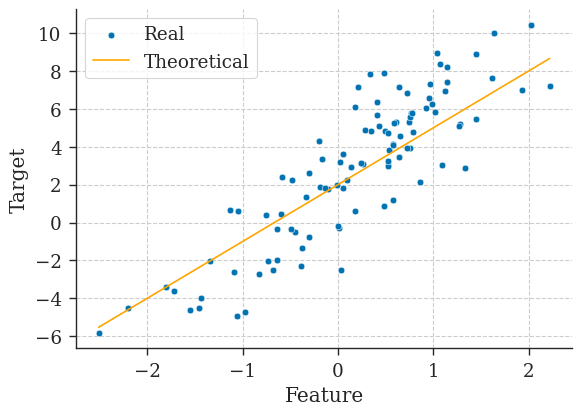

In [33]:
sns.scatterplot(y=y.numpy()[:, 0], x=x.numpy()[:, 0], label="Real")
sns.lineplot(y=(3 * x + 2).numpy()[:, 0], x=x.numpy()[:, 0], color="orange", label="Theoretical")
plt.xlabel("Feature")
plt.ylabel("Target");

In [34]:
# Generate random initial parameters (weights)
w0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)

w0, w1

(tensor([-1.3375], requires_grad=True), tensor([0.6449], requires_grad=True))

Make predictions and calculate the loss:

In [35]:
y_pred = w1 * x + w0
loss = torch.mean((y_pred - y) ** 2)

In [36]:
loss

tensor(27.7125, grad_fn=<MeanBackward0>)

Backpropagation in one line:

In [37]:
loss.backward()

In [38]:
print("∂L/∂w0 = \n", w0.grad)
print("∂L/∂w1 = \n", w1.grad)

∂L/∂w0 = 
 tensor([-8.1764])
∂L/∂w1 = 
 tensor([-6.4983])


#### Training our first model:

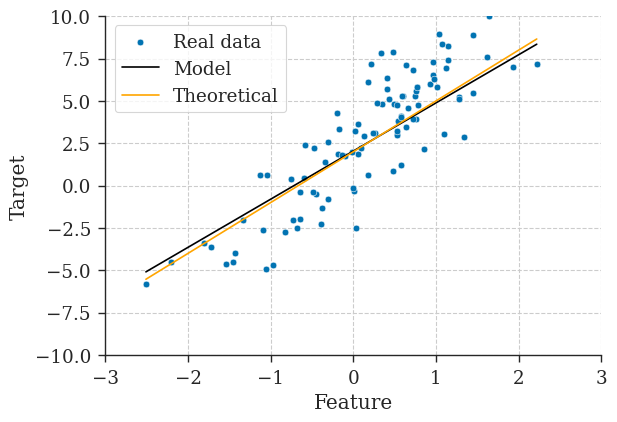

Epoch 65 / 200
loss =  4.164522
Done!


In [39]:
n_epochs = 200
lr = 0.01
w0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)

for i in range(n_epochs):
    y_pred = w1 * x + w0

    # Calculate loss
    loss = torch.mean((y_pred - y) ** 2)

    # Calculate gradients
    loss.backward()

    # Do a step towards anti-gradient (gradient descent)
    w0.data -= lr * w0.grad.data
    w1.data -= lr * w1.grad.data

    # Zero out the gradients, otherwise PyTorch will sum them up!!!
    w0.grad.data.zero_()
    w1.grad.data.zero_()

    # The rest code is just in order to track progress
    if (i+1) % 5 == 0:
        clear_output(True)
        sns.scatterplot(x=x.data.numpy()[:, 0], y=y.data.numpy()[:, 0], label="Real data")
        sns.lineplot(x=x.data.numpy()[:, 0], y=y_pred.data.numpy()[:, 0], label="Model",
                    color="black")
        sns.lineplot(x=x.numpy()[:, 0], y=(3 * x + 2).numpy()[:, 0], label="Theoretical",
                    color="orange")
        plt.xlabel("Feature")
        plt.ylabel("Target")
        plt.xlim(-3.0, 3.0)
        plt.ylim(-10, 10)
        plt.show()

        print(f"Epoch {i + 1} / {n_epochs}")
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 4.25:
            print("Done!")
            break

What if we don't zero out the gradients:

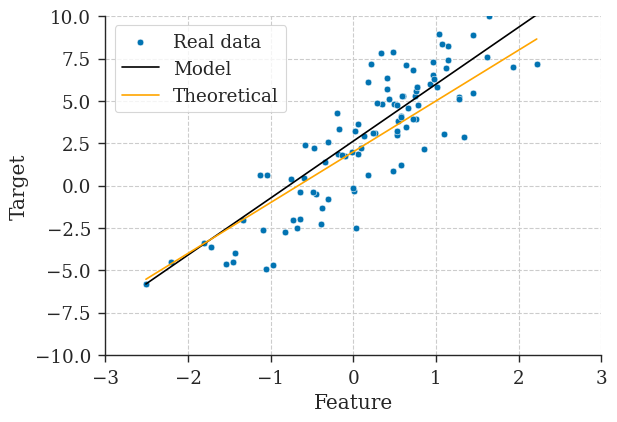

Epoch 115 / 200
loss =  3.7606852
Done!


In [40]:
n_epochs = 200
lr = 0.01
w0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)

for i in range(n_epochs):
    y_pred = w1 * x + w0

    # Calculate loss
    loss = torch.mean((y_pred - y) ** 2)

    # Calculate gradients
    loss.backward()

    # Do a step towards anti-gradient (gradient descent)
    w0.data -= lr * w0.grad.data
    w1.data -= lr * w1.grad.data

    # Don't zero out the gradients, so PyTorch will sum them up!!!
    # w0.grad.data.zero_()
    # w1.grad.data.zero_()

    # The rest code is just in order to track progress
    if (i+1) % 5 == 0:
        clear_output(True)
        sns.scatterplot(x=x.data.numpy()[:, 0], y=y.data.numpy()[:, 0], label="Real data")
        sns.lineplot(x=x.data.numpy()[:, 0], y=y_pred.data.numpy()[:, 0], label="Model",
                    color="black")
        sns.lineplot(x=x.numpy()[:, 0], y=(3 * x + 2).numpy()[:, 0], label="Theoretical",
                    color="orange")
        plt.xlabel("Feature")
        plt.ylabel("Target")
        plt.xlim(-3.0, 3.0)
        plt.ylim(-10, 10)
        plt.show()

        print(f"Epoch {i + 1} / {n_epochs}")
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 4.25:
            print("Done!")
            break

Computational graphs are dynamic:

In [41]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

## 4. Neural Networks with nn.Module

PyTorch provides the `nn.Module` class as the base for all neural network layers and models.

### Key Concepts:
- **nn.Module**: Base class for all neural network modules
- **Layers**: Building blocks (Linear, Conv2d, LSTM, etc.)
- **Sequential**: Container for stacking layers
- **Parameters**: Automatically tracked for optimization

In [42]:
# Method 1: Using nn.Sequential
model_sequential = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)
model_sequential

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
)

What is `nn.ReLU()`?

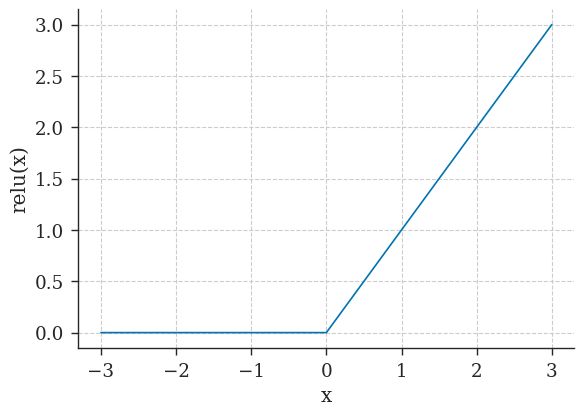

In [43]:
def relu(x):
    return torch.max(x, torch.zeros_like(x))

x = torch.tensor([-3, -2, -1, 0, 1, 2, 3])
sns.lineplot(x=x.numpy(), y=relu(x).numpy())
plt.xlabel("x")
plt.ylabel("relu(x)");

In [44]:
# Method 2: Custom nn.Module
class MyAwesomeNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Here we can do a lot of things, like:
        - Initialize the weights and biases
        - Define the activation functions
        - Define the number of layers
        But now let's just do something simple:
        """
        super(MyAwesomeNet, self).__init__() # Very important!
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        # x here is a tensor of logits (-∞, ∞)
        return x

model = MyAwesomeNet(input_size=10, hidden_size=20, output_size=1)

In [46]:
model

MyAwesomeNet(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
# The number of trainable parameters
print(f"\nTrainable parameters for sequential model: {sum(p.numel() for p in model_sequential.parameters() if p.requires_grad)}")
print(f"Trainable parameters for custom model: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")


Trainable parameters for sequential model: 661
Trainable parameters for custom model: 661


In [47]:
# Using the model
# Create dummy input
x = torch.randn(5, 10)  # 5 samples, 10 features
print(f"Input shape: {x.shape}")

# Forward pass
# We don't need to compute gradients here, so we use torch.no_grad()
with torch.no_grad():
    output = model_sequential(x)
    print(f"Output shape: {output.shape}")
    print(f"Output: {output}")

Input shape: torch.Size([5, 10])
Output shape: torch.Size([5, 1])
Output: tensor([[0.0355],
        [0.0775],
        [0.0950],
        [0.1365],
        [0.0772]])


## 5. Training a Neural Network

The most difficult but the most important. Now we need to implement a complete training loop for a neural network.

### Training Components:
- **Dataset**: Abstract class for data representation
- **Data Loader**: Batches data efficiently
- **Loss Function**: Measures prediction error
- **Optimizer**: Updates model parameters
- **Training Loop**: Forward pass, backward pass, parameter updates

In [48]:
!wget "https://github.com/vib-tcp/ml-summerschool-2025/raw/refs/heads/main/topic-4_deep-learning-protein-structures/day_1/dimers_features.csv"

--2025-08-25 09:46:11--  https://github.com/vib-tcp/ml-summerschool-2025/raw/refs/heads/main/topic-4_deep-learning-protein-structures/day_1/dimers_features.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vib-tcp/ml-summerschool-2025/refs/heads/main/topic-4_deep-learning-protein-structures/day_1/dimers_features.csv [following]
--2025-08-25 09:46:12--  https://raw.githubusercontent.com/vib-tcp/ml-summerschool-2025/refs/heads/main/topic-4_deep-learning-protein-structures/day_1/dimers_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 971818 (949K) [text/plain]
Saving to: ‘dimers_featu

In [51]:
!ls

dimers_features.csv  sample_data


In [52]:
# TODO: change the path to the data
dimer_data_path = Path("dimers_features.csv")
dimer_data = pd.read_csv(dimer_data_path, index_col=0)
y = dimer_data["physiological"]
print(f"Class distribution: {y.value_counts()}")
print(f"Number of dimers: {dimer_data.shape[0]}")
print(f"Number of columns: {dimer_data.shape[1]}")
dimer_data.head()

Class distribution: physiological
False    841
True     836
Name: count, dtype: int64
Number of dimers: 1677
Number of columns: 68


,pdb-id,global_area,global_area_per_atom,global_volume,global_volume_per_atom,global_energy,global_energy_per_atom,global_sas_area,global_sas_area_per_atom,global_sas_energy,...,contacts,gene,superfamily,pfam,binding_site_area,binding_site_area_polar,binding_site_area_apolar,fraction_polar,fraction_apolar,difficult
0,1a17_6,33290.7,12.99403,63046.7,24.60839,-6364.07,-2.48402,17047.60,6.65402,-1801.530,...,138,PPP5C,1.25.40.10,NaN,4153.16,1651.43,2501.74,0.397632,0.602370,False
1,1a3a_1,27576.3,12.20190,54497.2,24.11381,-7467.66,-3.30427,12863.40,5.69177,-1617.510,...,62,mtlA,3.40.930.10,PF00359,1868.68,826.64,1042.03,0.442366,0.557629,False
2,1a7g_1,16535.3,12.56482,32323.4,24.56185,-3276.97,-2.49010,8715.92,6.62304,371.893,...,72,E2,3.30.70.330,PF00511,1849.89,694.27,1155.61,0.375303,0.624691,False
3,1ac6_1,20742.3,12.13000,41277.9,24.13912,-5331.03,-3.11756,10556.20,6.17322,-802.868,...,43,TRAV6D-7,2.60.40.10,PF07686,1196.80,452.58,744.22,0.378158,0.621842,False
4,1afw_1,65759.5,11.19501,133638.0,22.75077,-16828.70,-2.86495,25731.70,4.38061,-1377.680,...,196,POT1,3.40.47.10,PF00108;PF02803,4846.12,1860.29,2985.83,0.383872,0.616128,False


For now we will just use a subset of the features and discuss this dataset more later:

In [53]:
features_to_use = [col for col in dimer_data.columns if col.startswith("split_")]
X = dimer_data[features_to_use]
print(f"Number of used features: {X.shape[1]}")
X.head()

Number of used features: 14


,split_area,split_area_per_atom,split_volume,split_volume_per_atom,split_energy,split_energy_per_atom,split_sas_area,split_sas_area_per_atom,split_sas_energy,split_sas_energy_per_atom,split_nonsas_area,split_nonsas_area_per_atom,split_nonsas_energy,split_nonsas_energy_per_atom
0,36100.7,14.09083,66589.0,25.99102,-5101.39,-1.99117,21251.3,8.29481,-1216.300,-0.47475,14849.4,5.79602,-3885.090,-1.51643
1,28767.8,12.72912,55897.6,24.73345,-7017.63,-3.10515,14769.9,6.53535,-1493.750,-0.66095,13997.9,6.19376,-5523.880,-2.44419
2,17688.7,13.44126,33954.9,25.80160,-2256.32,-1.71453,10585.0,8.04331,958.562,0.72839,7103.7,5.39795,-3214.882,-2.44292
3,21510.9,12.57947,42193.0,24.67427,-4876.31,-2.85164,11780.7,6.88930,-487.757,-0.28524,9730.2,5.69018,-4388.553,-2.56641
4,69013.4,11.74896,137834.0,23.46510,-15396.90,-2.62120,30628.6,5.21427,-562.925,-0.09583,38384.8,6.53470,-14833.975,-2.52536


To train a good model we should always evaluate its performance on a subset of the data that it doesn't use for training. Now we will split the data randomly, but usually it's not that trivial.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1341, 14)
X_test shape: (336, 14)
y_train shape: (1341,)
y_test shape: (336,)


Normalize the data:

In [55]:
x_mean, x_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train_scaled = (X_train - x_mean) / x_std
X_test_scaled = (X_test - x_mean) / x_std

#### Create a custom pytorch dataset

- Inherit your class from torch `Dataset`
- Implement 2 mandatory methods:
    * `__getitem__`
    * `__len__`

In [56]:
class DimerDataset(Dataset):
    def __init__(self, features, labels):
        self.feature_names = features.columns.tolist()
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        features = torch.tensor(self.features.iloc[idx].values, dtype=torch.float32)
        target = torch.tensor(self.labels.iloc[idx], dtype=torch.float32)
        return features, target

train_dataset = DimerDataset(X_train_scaled, y_train)
test_dataset = DimerDataset(X_test_scaled, y_test)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 1341
Test dataset size: 336


In [57]:
# Create data loaders (efficient batching)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# Why do we need shuffle=False or True?
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [58]:
train_batch = next(iter(train_loader))
train_batch[0].shape, train_batch[1].shape

(torch.Size([32, 14]), torch.Size([32]))

#### Model training

Initialize `model`, `criterion` (loss function) and `optimizer` to perform gradient descent

In [59]:
model = MyAwesomeNet(input_size=X_train.shape[1], hidden_size=1280, output_size=2)
criterion = nn.CrossEntropyLoss() # Or loss
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [60]:
# Training loop
print("=== Training Loop ===")

n_epochs = 100
batch_size = 32
train_losses = []
test_accuracies = []
train_accuracies = []
start_time = time.time()

for epoch in range(n_epochs):
    model.train()
    total_loss = 0

    # Mini-batch training
    train_predictions = []
    train_targets = []
    for batch_X, batch_y in train_loader:

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.to(torch.long))
        _, predicted = torch.max(outputs, 1)
        train_predictions.append(predicted.numpy())
        train_targets.append(batch_y.numpy())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_predictions = np.concatenate(train_predictions)
    train_targets = np.concatenate(train_targets)
    train_accuracies.append(accuracy_score(train_targets, train_predictions))

    # Evaluation
    model.eval()
    test_predictions = []
    test_targets = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            test_outputs = model(batch_X)
            _, predicted = torch.max(test_outputs, 1)
            test_predictions.append(predicted.numpy())
            test_targets.append(batch_y.numpy())

    test_predictions = np.concatenate(test_predictions)
    test_targets = np.concatenate(test_targets)
    train_losses.append(total_loss / (len(X_train) // batch_size))
    test_accuracies.append(accuracy_score(test_targets, test_predictions))

    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d}: Loss = {train_losses[-1]:.4f}, Train Acc = {train_accuracies[-1]:.2f}, Test Acc = {test_accuracies[-1]:.2f}")

print(f"\nFinal Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

=== Training Loop ===
Epoch   0: Loss = 0.6882, Train Acc = 0.63, Test Acc = 0.69
Epoch  10: Loss = 0.5674, Train Acc = 0.74, Test Acc = 0.71
Epoch  20: Loss = 0.5330, Train Acc = 0.76, Test Acc = 0.74
Epoch  30: Loss = 0.5159, Train Acc = 0.77, Test Acc = 0.74
Epoch  40: Loss = 0.5037, Train Acc = 0.77, Test Acc = 0.75
Epoch  50: Loss = 0.4947, Train Acc = 0.78, Test Acc = 0.75
Epoch  60: Loss = 0.4869, Train Acc = 0.78, Test Acc = 0.75
Epoch  70: Loss = 0.4806, Train Acc = 0.78, Test Acc = 0.76
Epoch  80: Loss = 0.4755, Train Acc = 0.78, Test Acc = 0.76
Epoch  90: Loss = 0.4708, Train Acc = 0.79, Test Acc = 0.76

Final Test Accuracy: 0.7738
Time taken: 40.84 seconds


### Exercise:

- What would happen if you don't normalize X?
- Try to run training with unnormalized X.

In [61]:
train_dataset_unnormalized = DimerDataset(X_train, y_train)
test_dataset_unnormalized = DimerDataset(X_test, y_test)

print(f"Train dataset size: {len(train_dataset_unnormalized)}")
print(f"Test dataset size: {len(test_dataset_unnormalized)}")

Train dataset size: 1341
Test dataset size: 336


In [62]:
# Create data loaders (efficient batching)
train_loader_unnormalized = DataLoader(train_dataset_unnormalized, batch_size=32, shuffle=True)
# Why do we need shuffle=False or True?
test_loader_unnormalized = DataLoader(test_dataset_unnormalized, batch_size=32, shuffle=False)

In [63]:
train_batch_unnormalized = next(iter(train_loader_unnormalized))
train_batch_unnormalized[0].shape, train_batch_unnormalized[1].shape

(torch.Size([32, 14]), torch.Size([32]))

In [65]:
model = MyAwesomeNet(input_size=X_train.shape[1], hidden_size=1280, output_size=2)
criterion = nn.CrossEntropyLoss() # Or loss
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [66]:
# Training loop
print("=== Training Loop ===")

n_epochs = 100
batch_size = 32
train_losses = []
test_accuracies = []
train_accuracies = []
start_time = time.time()

for epoch in range(n_epochs):
    model.train()
    total_loss = 0

    # Mini-batch training
    train_predictions = []
    train_targets = []
    for batch_X, batch_y in train_loader_unnormalized:

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.to(torch.long))
        _, predicted = torch.max(outputs, 1)
        train_predictions.append(predicted.numpy())
        train_targets.append(batch_y.numpy())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_predictions = np.concatenate(train_predictions)
    train_targets = np.concatenate(train_targets)
    train_accuracies.append(accuracy_score(train_targets, train_predictions))

    # Evaluation
    model.eval()
    test_predictions = []
    test_targets = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader_unnormalized:
            test_outputs = model(batch_X)
            _, predicted = torch.max(test_outputs, 1)
            test_predictions.append(predicted.numpy())
            test_targets.append(batch_y.numpy())

    test_predictions = np.concatenate(test_predictions)
    test_targets = np.concatenate(test_targets)
    train_losses.append(total_loss / (len(X_train) // batch_size))
    test_accuracies.append(accuracy_score(test_targets, test_predictions))

    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d}: Loss = {train_losses[-1]:.4f}, Train Acc = {train_accuracies[-1]:.2f}, Test Acc = {test_accuracies[-1]:.2f}")

print(f"\nFinal Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

=== Training Loop ===
Epoch   0: Loss = 17068513526637383680.0000, Train Acc = 0.50, Test Acc = 0.50
Epoch  10: Loss = 0.7027, Train Acc = 0.51, Test Acc = 0.50
Epoch  20: Loss = 0.7027, Train Acc = 0.51, Test Acc = 0.50
Epoch  30: Loss = 0.7027, Train Acc = 0.51, Test Acc = 0.50
Epoch  40: Loss = 0.7027, Train Acc = 0.51, Test Acc = 0.50
Epoch  50: Loss = 0.7027, Train Acc = 0.51, Test Acc = 0.50
Epoch  60: Loss = 0.7026, Train Acc = 0.51, Test Acc = 0.50
Epoch  70: Loss = 0.7027, Train Acc = 0.51, Test Acc = 0.50
Epoch  80: Loss = 0.7027, Train Acc = 0.51, Test Acc = 0.50
Epoch  90: Loss = 0.7026, Train Acc = 0.51, Test Acc = 0.50

Final Test Accuracy: 0.5000
Time taken: 40.18 seconds


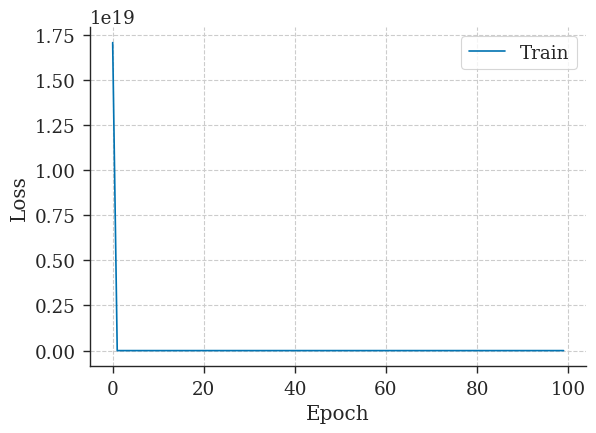

In [67]:
sns.lineplot(x=range(n_epochs), y=train_losses, label="Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

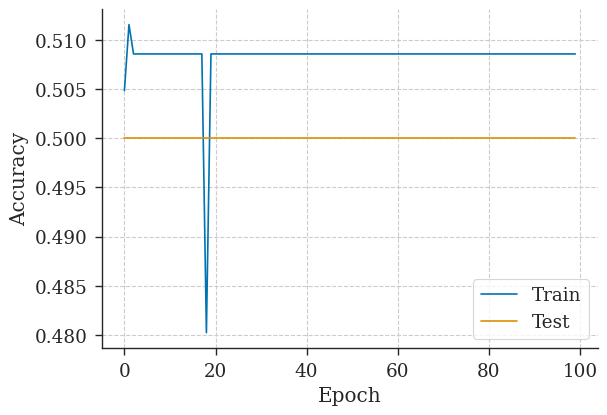

In [68]:
sns.lineplot(x=range(n_epochs), y=train_accuracies, label="Train");
sns.lineplot(x=range(n_epochs), y=test_accuracies, label="Test");
plt.xlabel("Epoch");
plt.ylabel("Accuracy");
plt.legend();

## 7. GPU Acceleration

PyTorch makes it easy to use GPUs for faster computation.

### Key Concepts:
- **device**: CPU or GPU
- **to()**: Move tensors/models to device
- **cuda.is_available()**: Check GPU availability

In [69]:
model = MyAwesomeNet(input_size=X_train.shape[1], hidden_size=1280, output_size=2)
model = model.to(device)
criterion = nn.CrossEntropyLoss() # Or loss
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [70]:
# Training loop
print("=== Training Loop ===")

n_epochs = 100
batch_size = 32
train_losses = []
test_accuracies = []
train_accuracies = []
start_time = time.time()

for epoch in range(n_epochs):
    model.train()
    total_loss = 0

    # Mini-batch training
    train_predictions = []
    train_targets = []
    for batch_X, batch_y in train_loader:
        # Put tensors on GPU
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.to(torch.long))
        _, predicted = torch.max(outputs, 1)
        train_predictions.append(predicted.cpu().numpy())
        train_targets.append(batch_y.cpu().numpy())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    train_predictions = np.concatenate(train_predictions)
    train_targets = np.concatenate(train_targets)
    train_accuracies.append(accuracy_score(train_targets, train_predictions))

    # Evaluation
    model.eval()
    test_predictions = []
    test_targets = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            test_outputs = model(batch_X)
            _, predicted = torch.max(test_outputs, 1)
            test_predictions.append(predicted.cpu().numpy())
            test_targets.append(batch_y.cpu().numpy())

    test_predictions = np.concatenate(test_predictions)
    test_targets = np.concatenate(test_targets)
    train_losses.append(total_loss / (len(X_train) // batch_size))
    test_accuracies.append(accuracy_score(test_targets, test_predictions))

    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d}: Loss = {train_losses[-1]:.4f}, Train Acc = {train_accuracies[-1]:.2f}, Test Acc = {test_accuracies[-1]:.2f}")

print(f"\nFinal Test Accuracy: {test_accuracies[-1]:.4f}")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

=== Training Loop ===
Epoch   0: Loss = 0.6688, Train Acc = 0.71, Test Acc = 0.68
Epoch  10: Loss = 0.5618, Train Acc = 0.74, Test Acc = 0.71
Epoch  20: Loss = 0.5308, Train Acc = 0.76, Test Acc = 0.74
Epoch  30: Loss = 0.5140, Train Acc = 0.77, Test Acc = 0.75
Epoch  40: Loss = 0.5024, Train Acc = 0.77, Test Acc = 0.76
Epoch  50: Loss = 0.4937, Train Acc = 0.78, Test Acc = 0.76
Epoch  60: Loss = 0.4866, Train Acc = 0.78, Test Acc = 0.76
Epoch  70: Loss = 0.4800, Train Acc = 0.78, Test Acc = 0.77
Epoch  80: Loss = 0.4749, Train Acc = 0.78, Test Acc = 0.77
Epoch  90: Loss = 0.4705, Train Acc = 0.79, Test Acc = 0.77

Final Test Accuracy: 0.7768
Time taken: 16.57 seconds


## 8. Best Practices and Tips

### Memory Management:
- Use `torch.no_grad()` for inference
- Clear gradients with `optimizer.zero_grad()`
- Use appropriate batch sizes

### Debugging:
- Check tensor shapes with `.shape`
- Use `print()` or `torch.sum()` for debugging
- Verify device placement

### Performance:
- Use GPU when available

### Common Pitfalls:
- Forgetting to call `model.train()` and `model.eval()`
- Not zeroing gradients
- Mixing CPU and GPU tensors

## 9. Summary and Next Steps

### What We've Covered:
1. **Tensors**: Basic operations and manipulation
2. **Autograd**: Automatic differentiation
3. **Neural Networks**: Building models with nn.Module
4. **Training**: Complete training loops
5. **Data Handling**: Datasets and DataLoaders
6. **GPU Acceleration**: Using CUDA
7. **Best Practices**: Common pitfalls and solutions

### Resources:
- [PyTorch Official Tutorials](https://pytorch.org/tutorials/)
- [PyTorch Documentation](https://pytorch.org/docs/)
- [PyTorch Forums](https://discuss.pytorch.org/)
- [GitHub Examples](https://github.com/pytorch/examples)